# Titik Koordinat Kabupaten/Kota

Data ini memuat informasi titik koordinat (latitude dan longitude) dari masing-masing kabupaten/kota yang berada di wilayah Provinsi Jawa Tengah.

**Sumber Data :** [Batas Admin - GeoIT Dev](https://batas-admin.geoit.dev/)

## Instalasi Packages

In [1]:
!pip install geopandas folium


## Import Library

In [2]:
import geopandas as gpd
import pandas as pd
import folium
import matplotlib.pyplot as plt


## Load Dataset

In [3]:
# Load SHP file
gdf = gpd.read_file("../Dataset/Lokasi/KAB_KOTA_JATENG.shp") 

# Proyeksikan ulang ke CRS metrik (datar) untuk menghitung centroid akurat
gdf_proj = gdf.to_crs(epsg=3857) 

# Centroid pada CRS datar
gdf_proj['centroid'] = gdf_proj.geometry.centroid

# Mengembalikan centroid ke WGS84 (lat-long)
gdf['latitude'] = gdf_proj['centroid'].to_crs(epsg=4326).y
gdf['longitude'] = gdf_proj['centroid'].to_crs(epsg=4326).x

gdf


,kode_kk,kode_pro,kab_kota,provinsi,fid,nama,label,geometry,latitude,longitude
0,33.71,33,Kota Magelang,Jawa Tengah,33.71,Kota Magelang,"Kota Magelang, Provinsi Jawa Tengah, 33.71","POLYGON ((110.22372 -7.50315, 110.22373 -7.503...",-7.476556,110.220111
1,33.12,33,Wonogiri,Jawa Tengah,33.12,Kabupaten Wonogiri,"Kabupaten Wonogiri, Provinsi Jawa Tengah, 33.12","POLYGON ((110.85887 -8.20565, 110.85883 -8.205...",-7.919332,110.999192
2,33.18,33,Pati,Jawa Tengah,33.18,Kabupaten Pati,"Kabupaten Pati, Provinsi Jawa Tengah, 33.18","POLYGON ((110.86501 -6.98036, 110.8646 -6.9812...",-6.743390,111.042283
3,33.73,33,Kota Salatiga,Jawa Tengah,33.73,Kota Salatiga,"Kota Salatiga, Provinsi Jawa Tengah, 33.73","POLYGON ((110.49737 -7.38868, 110.49724 -7.388...",-7.337680,110.498374
4,33.16,33,Blora,Jawa Tengah,33.16,Kabupaten Blora,"Kabupaten Blora, Provinsi Jawa Tengah, 33.16","POLYGON ((111.27397 -7.28959, 111.27376 -7.289...",-7.074486,111.387439
5,33.76,33,Kota Tegal,Jawa Tengah,33.76,Kota Tegal,"Kota Tegal, Provinsi Jawa Tengah, 33.76","POLYGON ((109.12123 -6.89849, 109.12104 -6.898...",-6.869175,109.115747
6,33.19,33,Kudus,Jawa Tengah,33.19,Kabupaten Kudus,"Kabupaten Kudus, Provinsi Jawa Tengah, 33.19","POLYGON ((110.81534 -6.9386, 110.81491 -6.9388...",-6.790280,110.869905
7,33.13,33,Karanganyar,Jawa Tengah,33.13,Kabupaten Karanganyar,"Kabupaten Karanganyar, Provinsi Jawa Tengah, 3...","MULTIPOLYGON (((110.92205 -7.61385, 110.92133 ...",-7.614162,111.019255
8,33.21,33,Demak,Jawa Tengah,33.21,Kabupaten Demak,"Kabupaten Demak, Provinsi Jawa Tengah, 33.21","POLYGON ((110.50966 -7.12257, 110.5096 -7.1225...",-6.910803,110.634000
9,33.05,33,Kebumen,Jawa Tengah,33.05,Kabupaten Kebumen,"Kabupaten Kebumen, Provinsi Jawa Tengah, 33.05","MULTIPOLYGON (((109.41118 -7.77751, 109.4113 -...",-7.654989,109.617356


In [4]:
gdf.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   kode_kk    35 non-null     object  
 1   kode_pro   35 non-null     object  
 2   kab_kota   35 non-null     object  
 3   provinsi   35 non-null     object  
 4   fid        35 non-null     object  
 5   nama       35 non-null     object  
 6   label      35 non-null     object  
 7   geometry   35 non-null     geometry
 8   latitude   35 non-null     float64 
 9   longitude  35 non-null     float64 
dtypes: float64(2), geometry(1), object(7)
memory usage: 2.9+ KB


## Filter Dataset

In [5]:
# Filter kolom data kab/kot + (long-lat)
df = gdf[['kab_kota', 'latitude', 'longitude']]

df


,kab_kota,latitude,longitude
0,Kota Magelang,-7.476556,110.220111
1,Wonogiri,-7.919332,110.999192
2,Pati,-6.743390,111.042283
3,Kota Salatiga,-7.337680,110.498374
4,Blora,-7.074486,111.387439
5,Kota Tegal,-6.869175,109.115747
6,Kudus,-6.790280,110.869905
7,Karanganyar,-7.614162,111.019255
8,Demak,-6.910803,110.634000
9,Kebumen,-7.654989,109.617356


## Export Cleaned Data to CSV

In [6]:
# Simpan ke CSV
df.to_csv("../Dataset/data_location.csv", index=False)


## Coord Point Visualization Based On Maps

In [7]:
# Lokasi peta di sekitar Jawa Tengah
map_center = [df['latitude'].mean(), df['longitude'].mean()]

# peta OpenStreetMap
m = folium.Map(location=map_center, zoom_start=8)

# Marker untuk setiap titik lokasi
for idx, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['kab_kota']).add_to(m)

# Peta
m


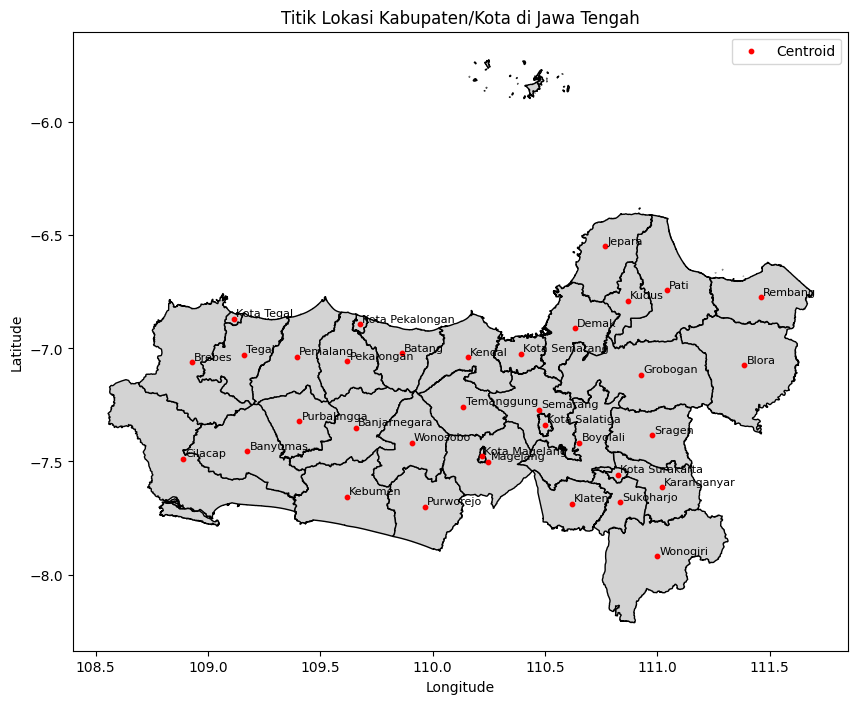

In [8]:
# Visualisasikan peta
fig, ax = plt.subplots(figsize=(10, 10))

# Plot batas geografis
gdf.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot titik centroid berdasarkan latitude dan longitude
ax.scatter(df['longitude'], df['latitude'], color='red', marker='o', s=10, label='Centroid')

# Menambahkan label untuk setiap titik
for i, row in df.iterrows():
    ax.text(row['longitude'] + 0.01, row['latitude'] + 0.01, row['kab_kota'], fontsize=8)

# Memberi judul peta
plt.title("Titik Lokasi Kabupaten/Kota di Jawa Tengah")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Menampilkan peta
plt.legend()
plt.show()


# Variabel Pendidikan di Provinsi Jawa Tengah (2023)

Data pendidikan dari Badan Pusat Statistik (BPS) Jawa Tengah mencakup informasi mengenai:

- **Jumlah Sekolah SMA**
- **Jumlah Guru SMA**
- **Jumlah Murid SMA**

Ketiga indikator tersebut tersedia untuk seluruh Kabupaten/Kota di Provinsi Jawa Tengah dan mencakup institusi **Negeri dan Swasta** di bawah naungan **Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi**.

Namun, dalam analisis ini, yang digunakan secara spesifik hanya variabel Jumlah Mahasiswa (gabungan Perguruan Tinggi Negeri dan Swasta). Variabel ini dipilih sebagai representasi tingkat aktivitas pendidikan tinggi di masing-masing wilayah, serta menjadi indikator utama untuk analisis spasial atau klasterisasi.

Sumber data: [BPS Jawa Tengah - Subjek Pendidikan](https://jateng.bps.go.id/id/statistics-table/3/YTFsRmNubEhOWE5ZTUZsdWVHOHhMMFpPWm5VMFp6MDkjMyMzMzAw/jumlah-sekolah--guru--dan-murid-sekolah-menengah-atas--sma--di-bawah-kementerian-pendidikan--kebudayaan--riset--dan-teknologi-menurut-kabupaten-kota-di-provinsi-jawa-tengah.html?year=2023)


## Load Dataset

In [9]:
import pandas as pd

# Membaca dataset CSV
file_path = '../Dataset/Pendidikan/Data_Pendidikan.csv'
data_pendidikan = pd.read_csv(file_path)

# Menampilkan data
data_pendidikan


,Kabupaten/Kota,Jumlah Sekolah SMA (Negeri),Jumlah Sekolah SMA (Swasta),Jumlah Sekolah SMA (Negeri+Swasta),Jumlah Guru SMA (Negeri),Jumlah Guru SMA (Swasta),Jumlah Guru SMA (Negeri+Swasta),Jumlah Murid SMA (Negeri),Jumlah Murid SMA (Swasta),Jumlah Murid SMA (Negeri+Swasta)
0,Cilacap,18,24,42,797,298,1095,15340,4016,19356
1,Banyumas,14,24,38,809,402,1211,15561,5684,21245
2,Purbalingga,10,6,16,459,120,579,9198,2587,11785
3,Banjarnegara,8,4,12,383,44,427,7384,888,8272
4,Kebumen,14,9,23,593,98,691,12038,1324,13362
5,Purworejo,11,12,23,451,136,587,8497,812,9309
6,Wonosobo,9,8,17,343,186,529,6680,3175,9855
7,Magelang,10,27,37,505,445,950,9373,6395,15768
8,Boyolali,15,15,30,679,226,905,12865,2943,15808
9,Klaten,15,8,23,774,144,918,14833,2447,17280


In [10]:
data_pendidikan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Kabupaten/Kota                      35 non-null     object
 1   Jumlah Sekolah SMA (Negeri)         35 non-null     int64 
 2   Jumlah Sekolah SMA (Swasta)         35 non-null     int64 
 3   Jumlah Sekolah SMA (Negeri+Swasta)  35 non-null     int64 
 4   Jumlah Guru SMA (Negeri)            35 non-null     int64 
 5   Jumlah Guru SMA (Swasta)            35 non-null     int64 
 6   Jumlah Guru SMA (Negeri+Swasta)     35 non-null     int64 
 7   Jumlah Murid SMA (Negeri)           35 non-null     int64 
 8   Jumlah Murid SMA (Swasta)           35 non-null     int64 
 9   Jumlah Murid SMA (Negeri+Swasta)    35 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 2.9+ KB


## Filter Dataset

In [11]:
data_pendidikan = data_pendidikan.iloc[:, [0, 9]]
data_pendidikan


,Kabupaten/Kota,Jumlah Murid SMA (Negeri+Swasta)
0,Cilacap,19356
1,Banyumas,21245
2,Purbalingga,11785
3,Banjarnegara,8272
4,Kebumen,13362
5,Purworejo,9309
6,Wonosobo,9855
7,Magelang,15768
8,Boyolali,15808
9,Klaten,17280


In [12]:
data_pendidikan.columns = ['kab_kota', 'Jumlah_Murid_SMA']


In [13]:
data_pendidikan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   kab_kota          35 non-null     object
 1   Jumlah_Murid_SMA  35 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 692.0+ bytes


In [14]:
data_pendidikan


,kab_kota,Jumlah_Murid_SMA
0,Cilacap,19356
1,Banyumas,21245
2,Purbalingga,11785
3,Banjarnegara,8272
4,Kebumen,13362
5,Purworejo,9309
6,Wonosobo,9855
7,Magelang,15768
8,Boyolali,15808
9,Klaten,17280


## Export Cleaned Data to CSV

In [15]:
data_pendidikan.to_csv('../Dataset/data_education.csv', index=False)


# Variabel Ekonomi di Provinsi Jawa Tengah

Data ekonomi dari Badan Pusat Statistik (BPS) Jawa Tengah mencakup informasi Pendpatan Domestik Regional Bruto (PDRB) pada tahun:

- **2022**
- **2023**

Data tersebut tersedia untuk seluruh Kabupaten/Kota di Provinsi Jawa Tengah. Namun, dalam analisis ini, yang digunakan secara spesifik adalah PDRB Provinsi Jawa Tengah pada tahun 2023. Variabel ini dipilih sebagai representasi kondisi sosial ekonomi masyarakat di setiap wilayah, serta menjadi indikator utama dalam analisis klasterisasi.

Sumber data: [BPS Jawa Tengah - Subjek Neraca Ekonomi](https://jateng.bps.go.id/id/statistics-table/2/MTc0MSMy/-seri-2010-pdrb-atas-dasar-harga-konstan-menurut-kabupaten-kota-di-provinsi-jawa-tengah.html)


## Load Dataset

In [16]:
import pandas as pd

# Membaca dataset CSV
file_path = '../Dataset/Ekonomi/PDRB_harga_konstan.csv'
data_ekonomi = pd.read_csv(file_path)

# Menampilkan data
data_ekonomi


,Kabupaten/Kota,2023
0,3301 Kabupaten Cilacap,1.018397e+08
1,3302 Kabupaten Banyumas,4.539630e+07
2,3303 Kabupaten Purbalingga,1.953386e+07
3,3304 Kabupaten Banjarnegara,1.717345e+07
4,3305 Kabupaten Kebumen,2.263890e+07
5,3306 Kabupaten Purworejo,1.502591e+07
6,3307 Kabupaten Wonosobo,1.540598e+07
7,3308 Kabupaten Magelang,2.621156e+07
8,3309 Kabupaten Boyolali,2.633430e+07
9,3310 Kabupaten Klaten,3.193833e+07


## Cleaning Data

In [17]:
# Membersihkan kolom 'Kabupaten/Kota'
data_ekonomi["Kabupaten/Kota"] = data_ekonomi["Kabupaten/Kota"].str.replace(r"^\d{4}\s", "", regex=True)  # Hapus kode 4 digit + spasi
data_ekonomi["Kabupaten/Kota"] = data_ekonomi["Kabupaten/Kota"].str.replace("Kabupaten ", "")  # Hapus kata "Kabupaten"


In [18]:
data_ekonomi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kabupaten/Kota  35 non-null     object 
 1   2023            35 non-null     float64
dtypes: float64(1), object(1)
memory usage: 692.0+ bytes


In [19]:
data_ekonomi.columns = ['kab_kota', 'PDRB_harga_konstan']


In [20]:
data_ekonomi


,kab_kota,PDRB_harga_konstan
0,Cilacap,1.018397e+08
1,Banyumas,4.539630e+07
2,Purbalingga,1.953386e+07
3,Banjarnegara,1.717345e+07
4,Kebumen,2.263890e+07
5,Purworejo,1.502591e+07
6,Wonosobo,1.540598e+07
7,Magelang,2.621156e+07
8,Boyolali,2.633430e+07
9,Klaten,3.193833e+07


## Export Cleaned Data to CSV

In [21]:
data_ekonomi.to_csv('../Dataset/data_economic.csv', index=False)


# Merge Dataset

Dataset titik koordinat, data pendidikan, dan data ekonomi digabung berdasarkan 'kab_kota'

## Read Dataset

In [22]:
import pandas as pd

# Path dataset
loc_path = "../Dataset/data_location.csv"
edu_path = "../Dataset/data_education.csv"
eco_path = "../Dataset/data_economic.csv"

# Load semua dataset
location = pd.read_csv(loc_path)
education = pd.read_csv(edu_path)
economic = pd.read_csv(eco_path)

# Melakukan merge berdasarkan kolom 'kab_kota'
merged_data = location.merge(education, on='kab_kota', how='inner')  
merged_data = merged_data.merge(economic, on='kab_kota', how='inner')

merged_data


,kab_kota,latitude,longitude,Jumlah_Murid_SMA,PDRB_harga_konstan
0,Kota Magelang,-7.476556,110.220111,5744,7.264924e+06
1,Wonogiri,-7.919332,110.999192,11403,2.356688e+07
2,Pati,-6.743390,111.042283,14973,3.498466e+07
3,Kota Salatiga,-7.337680,110.498374,4672,1.091869e+07
4,Blora,-7.074486,111.387439,9573,1.918492e+07
5,Kota Tegal,-6.869175,109.115747,6201,1.246861e+07
6,Kudus,-6.790280,110.869905,10592,7.298440e+07
7,Karanganyar,-7.614162,111.019255,11382,3.020824e+07
8,Demak,-6.910803,110.634000,16371,2.083975e+07
9,Kebumen,-7.654989,109.617356,13362,2.263890e+07


## Export Dataset to CSV

In [23]:
merged_data.to_csv("../Dataset/data_cleaned.csv", index=False)


# Data Normalization

## Standard Scalling

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Kolom numerik yang ingin dinormalisasi
num_col = ['Jumlah_Murid_SMA', 'PDRB_harga_konstan']

# Inisialisasi scaler
scaler = StandardScaler()

# Transformasi data
merged_data = merged_data.copy()
merged_data[num_col] = scaler.fit_transform(merged_data[num_col])

# Menampilkan hasil
merged_data


,kab_kota,latitude,longitude,Jumlah_Murid_SMA,PDRB_harga_konstan
0,Kota Magelang,-7.476556,110.220111,-1.319038,-0.849999
1,Wonogiri,-7.919332,110.999192,-0.281957,-0.277680
2,Pati,-6.743390,111.042283,0.372289,0.123168
3,Kota Salatiga,-7.337680,110.498374,-1.515495,-0.721725
4,Blora,-7.074486,111.387439,-0.617327,-0.431519
5,Kota Tegal,-6.869175,109.115747,-1.235287,-0.667311
6,Kudus,-6.790280,110.869905,-0.430582,1.457237
7,Karanganyar,-7.614162,111.019255,-0.285805,-0.044520
8,Demak,-6.910803,110.634000,0.628490,-0.373423
9,Kebumen,-7.654989,109.617356,0.077054,-0.310259


## Export Data Scaled to CSV

In [25]:
merged_data.to_csv("../Dataset/data_normalized.csv", index=False)
